In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline

In [ ]:
df=pd.read_csv('realdonaldtrump.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43352 entries, 0 to 43351
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         43352 non-null  int64 
 1   link       43352 non-null  object
 2   content    43352 non-null  object
 3   date       43352 non-null  object
 4   retweets   43352 non-null  int64 
 5   favorites  43352 non-null  int64 
 6   mentions   20386 non-null  object
 7   hashtags   5583 non-null   object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


In [ ]:
df.isna().sum()

id               0
link             0
content          0
date             0
retweets         0
favorites        0
mentions     22966
hashtags     37769
dtype: int64

In [ ]:
df['content'].value_counts()

MAKE AMERICA GREAT AGAIN!                                                                                                                        39
PRESIDENTIAL HARASSMENT!                                                                                                                         10
LAW & ORDER!                                                                                                                                      7
KEEP AMERICA GREAT!                                                                                                                               7
95% Approval Rating in the Republican Party. Thank you!                                                                                           6
                                                                                                                                                 ..
" @ RickClement It's tough work reading all those speeches from a teleprompter. Real leaders lead. Like you Dona

In [ ]:
y=df['content'].values
y.shape

(43352,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(y_train,y_test)=train_test_split(y,test_size=0.2)
y_train.shape
y_test.shape 

(8671,)

In [ ]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'Content'})


In [ ]:
df2.head()


,Content
0,Looking forward to my @ theFAMiLYLEADER summit...
1,"Spitzer failed as A.G., failed as Governor in ..."
2,Why do the losers & haters always say I wear a...
3,AMAZING - @ BarackObama has actually found a g...
4,""" @ mrinho1: @ Orbitz @ realDonaldTrump @ Trum..."


In [ ]:
df4=pd.DataFrame(y_test)
df4=df4.rename(columns={0:'Content'})


In [ ]:
df4.head()

,Content
0,Hopefully others will follow suit. Our country...
1,Witch Hunt!https://twitter.com/DanScavino/stat...
2,"No matter how far down a path you go, if it's ..."
3,@ toddulu Fun!
4,Great basketball game last night. Congratulati...


In [ ]:
my_series = df2.squeeze()

print(my_series)

0        Looking forward to my @ theFAMiLYLEADER summit...
1        Spitzer failed as A.G., failed as Governor in ...
2        Why do the losers & haters always say I wear a...
3        AMAZING - @ BarackObama has actually found a g...
4        " @ mrinho1: @ Orbitz @ realDonaldTrump @ Trum...
                               ...                        
34676    Thanks Kayleigh!https://twitter.com/GOP/status...
34677    ...The ads made her look great and now she pro...
34678    Featuring private living spaces, oversized bat...
34679    https://www.whitehouse.gov/presidential-action...
34680    I was just given a great tour of Moscow - fant...
Name: Content, Length: 34681, dtype: object


In [ ]:
ls = my_series.tolist()
ls

['Looking forward to my @ theFAMiLYLEADER summit visit and speech.',
 "Spitzer failed as A.G., failed as Governor in disgrace, and was fired on all T.V. shows (boring and zero ratings), and he's at it again!",
 'Why do the losers & haters always say I wear a “wig” when they know I don’t. Like it or not, it’s all mine—just ask Barbara Walters.',
 'AMAZING - @ BarackObama has actually found a government program he can cut in half - the Defense Department...bad (cont) http://tl.gd/f6bbrs',
 '" @ mrinho1: @ Orbitz @ realDonaldTrump @ TrumpWaikiki Looks like my kind of place D. Trump. You are the man my friend" Thanks, a great hotel.',
 'Vote @ MikeGarcia2020 by May 12th! His opponent @ ChristyforCA25 voted to fire teachers, and cut their salaries while bumping up her pay. Now she’s mocking our Great Vets! We need Navy Fighter Pilot Mike Garcia in # CA25!https://secure.winred.com/mikegarcia/donate …',
 'We must stop releasing hard core criminals all over the United States. Our country must 

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
import string

In [ ]:
string.punctuation = string.punctuation +'“'+'”'+'-'+'’'+'‘'+'—'
string.punctuation = string.punctuation.replace('.', '')

In [ ]:
file_with_nl_removed = []
for line in ls:
  line_with_nl_removed = line.replace("\n", " ")
  file_with_nl_removed += line_with_nl_removed
file_p = "".join([char for char in file_with_nl_removed if char not in string.punctuation])

In [ ]:
file_p

In [ ]:
#sentences = nltk.sent_tokenize(file_p)
#words = nltk.word_tokenize(file_p)
#unique_words = set(words)


In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

filtered_sentence = remove_stopwords(file_p)


In [ ]:
filtered_sentence

In [130]:
from nltk.tokenize import word_tokenize 
unigram = nltk.word_tokenize(filtered_sentence)
unigram


['Looking',
 'forward',
 'theFAMiLYLEADER',
 'summit',
 'visit',
 'speech.Spitzer',
 'failed',
 'A.G.',
 'failed',
 'Governor',
 'disgrace',
 'fired',
 'T.V',
 '.',
 'shows',
 'boring',
 'zero',
 'ratings',
 'hes',
 'againWhy',
 'losers',
 'haters',
 'I',
 'wear',
 'wig',
 'know',
 'I',
 'dont',
 '.',
 'Like',
 'minejust',
 'ask',
 'Barbara',
 'Walters.AMAZING',
 'BarackObama',
 'actually',
 'government',
 'program',
 'cut',
 'half',
 'Defense',
 'Department',
 '...',
 'bad',
 'cont',
 'httptl.gdf6bbrs',
 'mrinho1',
 'Orbitz',
 'realDonaldTrump',
 'TrumpWaikiki',
 'Looks',
 'like',
 'kind',
 'place',
 'D.',
 'Trump',
 '.',
 'You',
 'man',
 'friend',
 'Thanks',
 'great',
 'hotel.Vote',
 'MikeGarcia2020',
 'May',
 '12th',
 'His',
 'opponent',
 'ChristyforCA25',
 'voted',
 'teachers',
 'cut',
 'salaries',
 'bumping',
 'pay',
 '.',
 'Now',
 'shes',
 'mocking',
 'Great',
 'Vets',
 'We',
 'need',
 'Navy',
 'Fighter',
 'Pilot',
 'Mike',
 'Garcia',
 'CA25httpssecure.winred.commikegarciadonate'

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import ngrams
bigram = []
n = 2
n_grams = ngrams(filtered_sentence.split(), n)
for bigrams in n_grams:
    bigram.append(bigrams)

In [ ]:
bigram

[('Looking', 'forward'),
 ('forward', 'theFAMiLYLEADER'),
 ('theFAMiLYLEADER', 'summit'),
 ('summit', 'visit'),
 ('visit', 'speech.Spitzer'),
 ('speech.Spitzer', 'failed'),
 ('failed', 'A.G.'),
 ('A.G.', 'failed'),
 ('failed', 'Governor'),
 ('Governor', 'disgrace'),
 ('disgrace', 'fired'),
 ('fired', 'T.V.'),
 ('T.V.', 'shows'),
 ('shows', 'boring'),
 ('boring', 'zero'),
 ('zero', 'ratings'),
 ('ratings', 'hes'),
 ('hes', 'againWhy'),
 ('againWhy', 'losers'),
 ('losers', 'haters'),
 ('haters', 'I'),
 ('I', 'wear'),
 ('wear', 'wig'),
 ('wig', 'know'),
 ('know', 'I'),
 ('I', 'dont.'),
 ('dont.', 'Like'),
 ('Like', 'minejust'),
 ('minejust', 'ask'),
 ('ask', 'Barbara'),
 ('Barbara', 'Walters.AMAZING'),
 ('Walters.AMAZING', 'BarackObama'),
 ('BarackObama', 'actually'),
 ('actually', 'government'),
 ('government', 'program'),
 ('program', 'cut'),
 ('cut', 'half'),
 ('half', 'Defense'),
 ('Defense', 'Department...bad'),
 ('Department...bad', 'cont'),
 ('cont', 'httptl.gdf6bbrs'),
 ('httptl.g

In [ ]:
from nltk import ngrams
trigram = []
n = 3
n_grams = ngrams(filtered_sentence.split(), n)
for trigrams in n_grams:
    trigram.append(trigrams)

In [ ]:
trigram

[('Looking', 'forward', 'theFAMiLYLEADER'),
 ('forward', 'theFAMiLYLEADER', 'summit'),
 ('theFAMiLYLEADER', 'summit', 'visit'),
 ('summit', 'visit', 'speech.Spitzer'),
 ('visit', 'speech.Spitzer', 'failed'),
 ('speech.Spitzer', 'failed', 'A.G.'),
 ('failed', 'A.G.', 'failed'),
 ('A.G.', 'failed', 'Governor'),
 ('failed', 'Governor', 'disgrace'),
 ('Governor', 'disgrace', 'fired'),
 ('disgrace', 'fired', 'T.V.'),
 ('fired', 'T.V.', 'shows'),
 ('T.V.', 'shows', 'boring'),
 ('shows', 'boring', 'zero'),
 ('boring', 'zero', 'ratings'),
 ('zero', 'ratings', 'hes'),
 ('ratings', 'hes', 'againWhy'),
 ('hes', 'againWhy', 'losers'),
 ('againWhy', 'losers', 'haters'),
 ('losers', 'haters', 'I'),
 ('haters', 'I', 'wear'),
 ('I', 'wear', 'wig'),
 ('wear', 'wig', 'know'),
 ('wig', 'know', 'I'),
 ('know', 'I', 'dont.'),
 ('I', 'dont.', 'Like'),
 ('dont.', 'Like', 'minejust'),
 ('Like', 'minejust', 'ask'),
 ('minejust', 'ask', 'Barbara'),
 ('ask', 'Barbara', 'Walters.AMAZING'),
 ('Barbara', 'Walters.A

In [131]:
frequency_unigrams = nltk.FreqDist(unigram)


In [193]:
frequency_unigrams

FreqDist({'Looking': 96,
          'forward': 420,
          'theFAMiLYLEADER': 10,
          'summit': 4,
          'visit': 95,
          'speech.Spitzer': 1,
          'failed': 158,
          'A.G.': 33,
          'Governor': 202,
          'disgrace': 60,
          'fired': 123,
          'T.V': 28,
          '.': 27260,
          'shows': 117,
          'boring': 60,
          'zero': 70,
          'ratings': 235,
          'hes': 184,
          'againWhy': 1,
          'losers': 87,
          'haters': 77,
          'I': 5882,
          'wear': 30,
          'wig': 10,
          'know': 655,
          'dont': 902,
          'Like': 147,
          'minejust': 2,
          'ask': 91,
          'Barbara': 17,
          'Walters.AMAZING': 1,
          'BarackObama': 493,
          'actually': 129,
          'government': 171,
          'program': 38,
          'cut': 78,
          'half': 33,
          'Defense': 39,
          'Department': 71,
          '...': 3227,
          'bad'

In [ ]:
frequency_bigrams = nltk.FreqDist(bigram)



In [192]:
frequency_bigrams

FreqDist({('Looking', 'forward'): 78,
          ('forward', 'theFAMiLYLEADER'): 1,
          ('theFAMiLYLEADER', 'summit'): 2,
          ('summit', 'visit'): 1,
          ('visit', 'speech.Spitzer'): 1,
          ('speech.Spitzer', 'failed'): 1,
          ('failed', 'A.G.'): 1,
          ('A.G.', 'failed'): 1,
          ('failed', 'Governor'): 1,
          ('Governor', 'disgrace'): 1,
          ('disgrace', 'fired'): 1,
          ('fired', 'T.V.'): 1,
          ('T.V.', 'shows'): 1,
          ('shows', 'boring'): 1,
          ('boring', 'zero'): 1,
          ('zero', 'ratings'): 1,
          ('ratings', 'hes'): 1,
          ('hes', 'againWhy'): 1,
          ('againWhy', 'losers'): 1,
          ('losers', 'haters'): 10,
          ('haters', 'I'): 4,
          ('I', 'wear'): 12,
          ('wear', 'wig'): 7,
          ('wig', 'know'): 3,
          ('know', 'I'): 29,
          ('I', 'dont.'): 4,
          ('dont.', 'Like'): 2,
          ('Like', 'minejust'): 2,
          ('minejust', 'ask

In [ ]:
import nltk
from nltk import ConditionalFreqDist
nltk.ConditionalFreqDist()

ConditionalFreqDist(nltk.probability.FreqDist, {})

In [ ]:
import pandas as pd 

 
 
freq = nltk.FreqDist(frequency_bigrams)
 
 
bf = pd.DataFrame(list(freq.items()), columns = ["Words","Frequency"]) 

In [ ]:
bf

,Words,Frequency
0,"(Looking, forward)",78
1,"(forward, theFAMiLYLEADER)",1
2,"(theFAMiLYLEADER, summit)",2
3,"(summit, visit)",1
4,"(visit, speech.Spitzer)",1
...,...,...
304923,"(fantastic, hard)",1
304924,"(people., CITY)",1
304925,"(CITY, IS)",1
304926,"(REALLY, ENERGIZED)",1


In [ ]:
frequency_trigrams = nltk.FreqDist(trigram)

In [191]:
frequency_trigrams


FreqDist({('Looking', 'forward', 'theFAMiLYLEADER'): 1,
          ('forward', 'theFAMiLYLEADER', 'summit'): 1,
          ('theFAMiLYLEADER', 'summit', 'visit'): 1,
          ('summit', 'visit', 'speech.Spitzer'): 1,
          ('visit', 'speech.Spitzer', 'failed'): 1,
          ('speech.Spitzer', 'failed', 'A.G.'): 1,
          ('failed', 'A.G.', 'failed'): 1,
          ('A.G.', 'failed', 'Governor'): 1,
          ('failed', 'Governor', 'disgrace'): 1,
          ('Governor', 'disgrace', 'fired'): 1,
          ('disgrace', 'fired', 'T.V.'): 1,
          ('fired', 'T.V.', 'shows'): 1,
          ('T.V.', 'shows', 'boring'): 1,
          ('shows', 'boring', 'zero'): 1,
          ('boring', 'zero', 'ratings'): 1,
          ('zero', 'ratings', 'hes'): 1,
          ('ratings', 'hes', 'againWhy'): 1,
          ('hes', 'againWhy', 'losers'): 1,
          ('againWhy', 'losers', 'haters'): 1,
          ('losers', 'haters', 'I'): 4,
          ('haters', 'I', 'wear'): 2,
          ('I', 'wear', 'wig

In [181]:
import pandas as pd 
import nltk 
 
 
freq = nltk.FreqDist(frequency_trigrams)
 
 
df = pd.DataFrame(list(freq.items()), columns = ["Word","Frequency"]) 

In [182]:
df

,Word,Frequency
0,"(Looking, forward, theFAMiLYLEADER)",1
1,"(forward, theFAMiLYLEADER, summit)",1
2,"(theFAMiLYLEADER, summit, visit)",1
3,"(summit, visit, speech.Spitzer)",1
4,"(visit, speech.Spitzer, failed)",1
...,...,...
372197,"(CITY, IS, REALLY)",1
372198,"(IS, REALLY, ENERGIZED)",1
372199,"(REALLY, ENERGIZED, The)",1
372200,"(ENERGIZED, The, World)",1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc22a12c50>]],
      dtype=object)

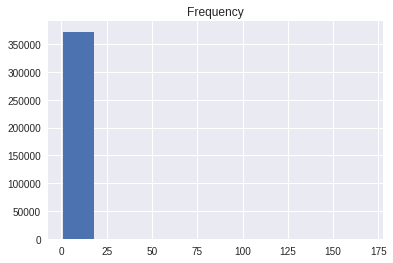

In [ ]:
df.hist(column='Frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc2125bb90>]],
      dtype=object)

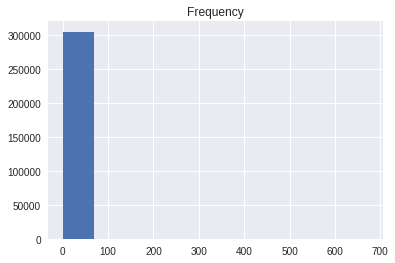

In [ ]:
bf.hist(column='Frequency')

In [152]:
def calcBigramProb(listOfBigrams, unigramCounts, bigramCounts):
    listOfProb = []
    for bigram in listOfBigrams:
        word1 = bigram[0]
        word2 = bigram[1]
    return listOfProb.append((bigramCounts.get(bigram))/(unigramCounts.get(word1)))  
    
    

In [163]:
calcBigramProb(bigram, frequency_unigrams, frequency_bigrams)
listOfProb

{('A.G.', 'failed'): 0.030303030303030304,
 ('Governor', 'disgrace'): 0.0049504950495049506,
 ('Looking', 'forward'): 0.8125,
 ('disgrace', 'fired'): 0.016666666666666666,
 ('failed', 'A.G.'): 0.006329113924050633,
 ('failed', 'Governor'): 0.006329113924050633,
 ('fired', 'T.V.'): 0.008130081300813009,
 ('forward', 'theFAMiLYLEADER'): 0.002380952380952381,
 ('speech.Spitzer', 'failed'): 1.0,
 ('summit', 'visit'): 0.25,
 ('theFAMiLYLEADER', 'summit'): 0.2,
 ('visit', 'speech.Spitzer'): 0.010526315789473684}

In [173]:
import math 

In [198]:
def calctrigramProb(listOftrigrams, bigramCounts, trigramCounts):
    listOfProb = []
    for bigram in listOftrigrams:
        word1 = bigram[0]
        word2 = bigram[2]
    return listOfProb.append((trigramCounts.get(bigram))/(bigramCounts.get(word2)))  